Importing the Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Reading the data:

In [2]:
data = pd.read_csv('plant_disease_dataset.csv')

data.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


Splitting the data into training and test sets

In [3]:
X = data.values[:, 0:4]
Y = data.values[:, 4]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Training the model on the training set:

In [4]:
classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=3000,
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    validation_fraction=0.1,
    n_iter_no_change=50,
    verbose=1
)
classifier.fit(X_train,y_train)

Iteration 1, loss = 0.56374088
Iteration 2, loss = 0.48747289
Iteration 3, loss = 0.47548703
Iteration 4, loss = 0.46719633
Iteration 5, loss = 0.46060340
Iteration 6, loss = 0.45519701
Iteration 7, loss = 0.45034760
Iteration 8, loss = 0.44690017
Iteration 9, loss = 0.44205435
Iteration 10, loss = 0.43875178
Iteration 11, loss = 0.43454503
Iteration 12, loss = 0.43144480
Iteration 13, loss = 0.42757368
Iteration 14, loss = 0.42567577
Iteration 15, loss = 0.42213886
Iteration 16, loss = 0.42011207
Iteration 17, loss = 0.41720634
Iteration 18, loss = 0.41566472
Iteration 19, loss = 0.41523082
Iteration 20, loss = 0.41278754
Iteration 21, loss = 0.41000741
Iteration 22, loss = 0.40932914
Iteration 23, loss = 0.40792434
Iteration 24, loss = 0.40730098
Iteration 25, loss = 0.40556384
Iteration 26, loss = 0.40532576
Iteration 27, loss = 0.40469186
Iteration 28, loss = 0.40306271
Iteration 29, loss = 0.40330363
Iteration 30, loss = 0.40357456
Iteration 31, loss = 0.40206964
Iteration 32, los

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,3000
,shuffle,True
,random_state,None


Testing the model, and checking results.

In [5]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = classifier.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")
print(classification_report(y_test, y_pred))


Test Accuracy: 83.3%
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      2274
         1.0       0.69      0.57      0.62       726

    accuracy                           0.83      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.83      0.83      0.83      3000



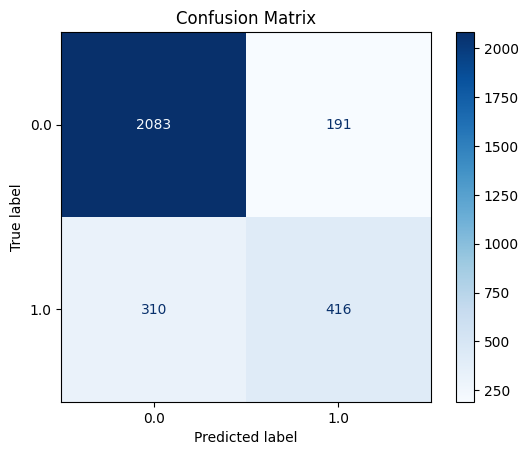

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

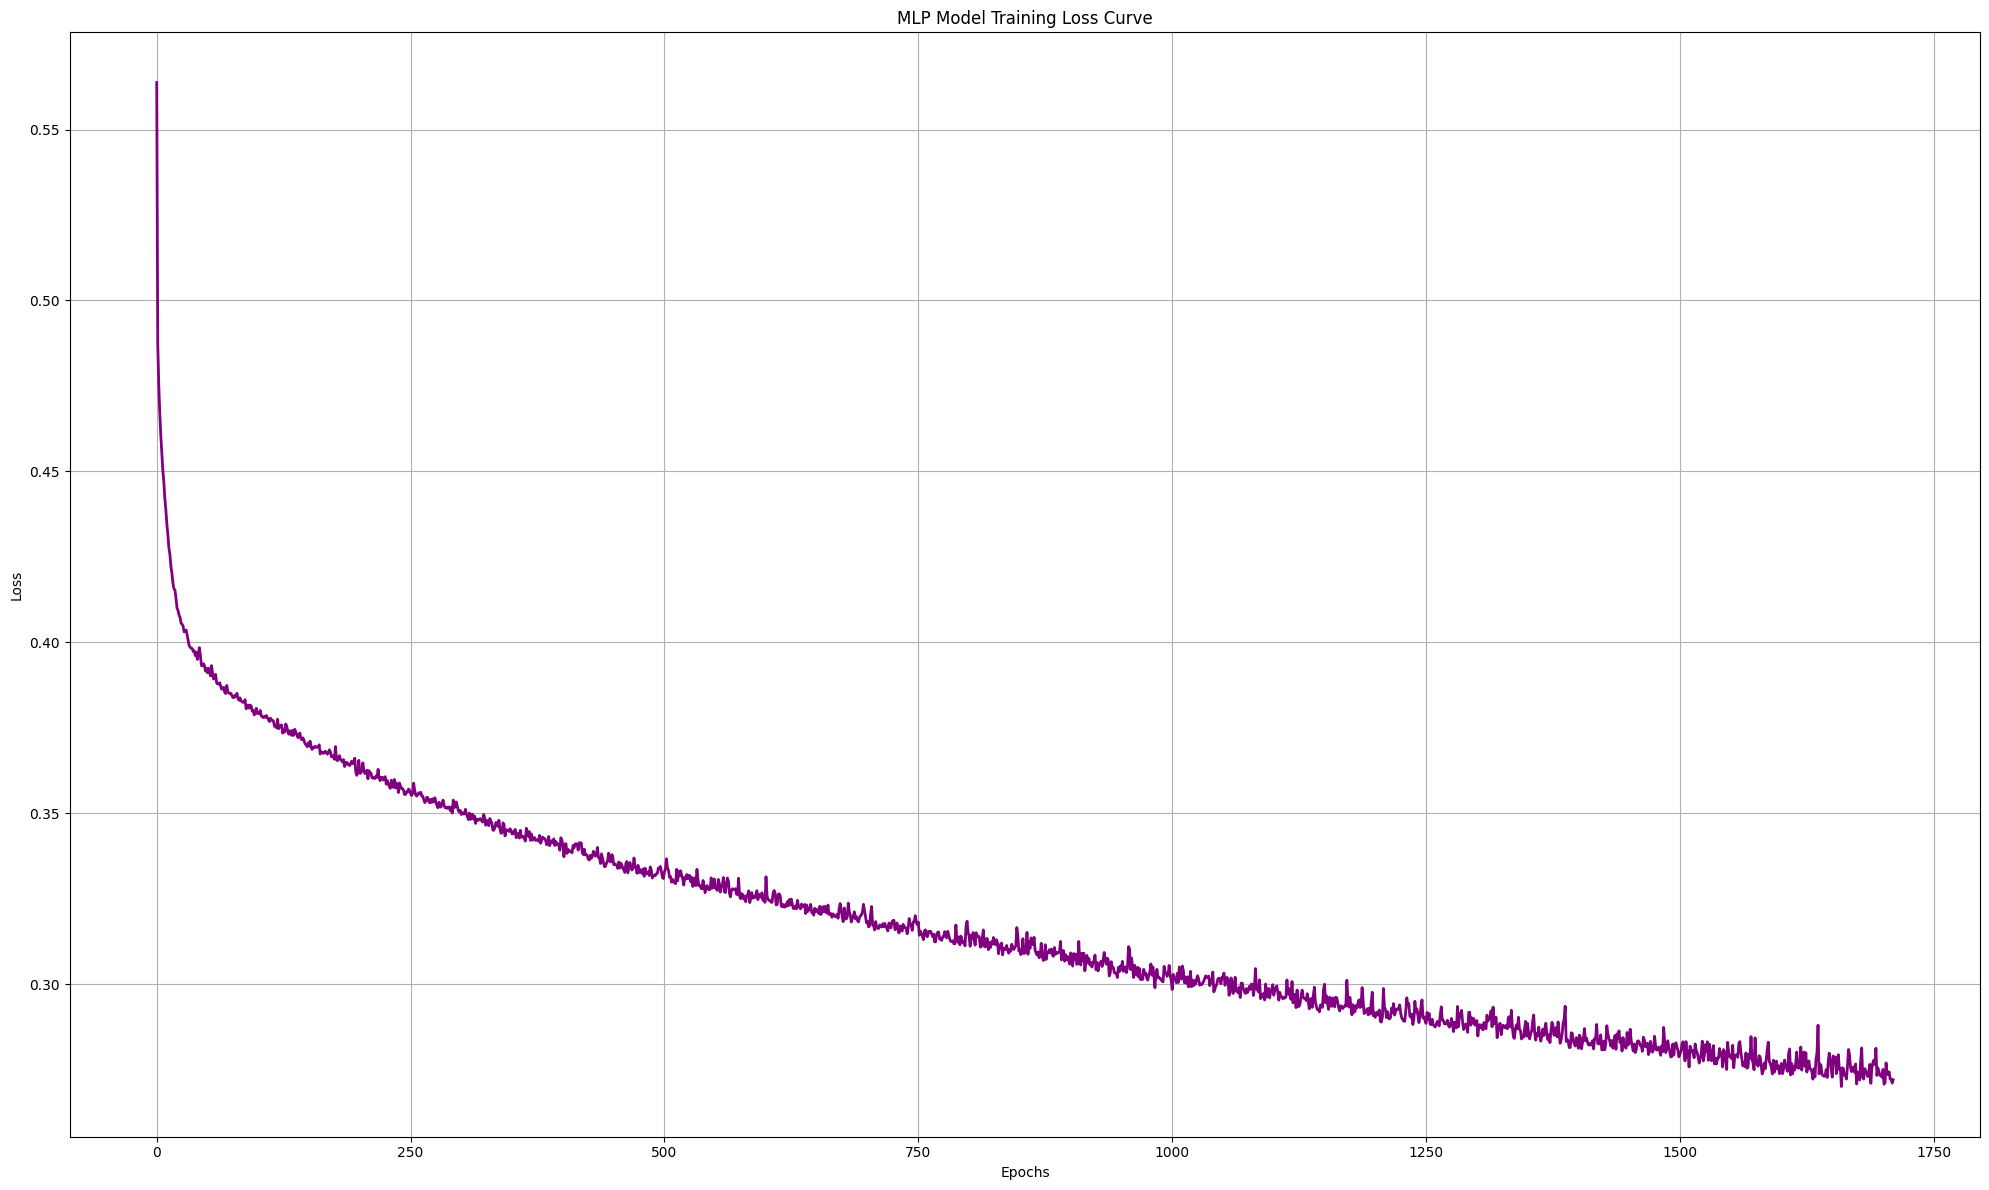

In [7]:
if hasattr(classifier, 'loss_curve_'):
    plt.figure(figsize=(20,12))
    plt.plot(classifier.loss_curve_, color='purple', linewidth=2)
    plt.title('MLP Model Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Loss curve is not available for this model.")